<a href="https://colab.research.google.com/github/ayush9304/NetflixMoviesAndTVShowsClustering/blob/main/Netflix_Movies_and_TV_Shows_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - 



##### **Project Type**    - Unsupervised
##### **Contribution**    - Individual
##### **Team Member 1 - Ayush Kumar**

# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

[https://github.com/ayush9304/NetflixMoviesAndTVShowsClustering](https://github.com/ayush9304/NetflixMoviesAndTVShowsClustering)

# **Problem Statement**


**Write Problem Statement Here.**

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import string
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import PCA

from sklearn.cluster import KMeans, AgglomerativeClustering
import scipy.cluster.hierarchy as shc
from sklearn.metrics import silhouette_score

from wordcloud import WordCloud, STOPWORDS

from collections import Counter
import itertools

sns.set(style='whitegrid')
pd.set_option('display.max_columns', None)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


### Dataset Loading

In [3]:
# Load Dataset
dataset = pd.read_csv("https://raw.githubusercontent.com/ayush9304/NetflixMoviesAndTVShowsClustering/main/NETFLIX%20MOVIES%20AND%20TV%20SHOWS%20CLUSTERING.csv")

### Dataset First View

In [4]:
# Dataset First Look
dataset.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


### Dataset Rows & Columns count

In [5]:
# Dataset Rows & Columns count
dataset.shape

(7787, 12)

### Dataset Information

In [6]:
# Dataset Info
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


#### Duplicate Values

In [8]:
# Dataset Duplicate Value Count
dataset[dataset.duplicated()].shape[0]

0

#### Missing Values/Null Values

In [9]:
# Missing Values/Null Values Count
dataset.isna().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

<Axes: >

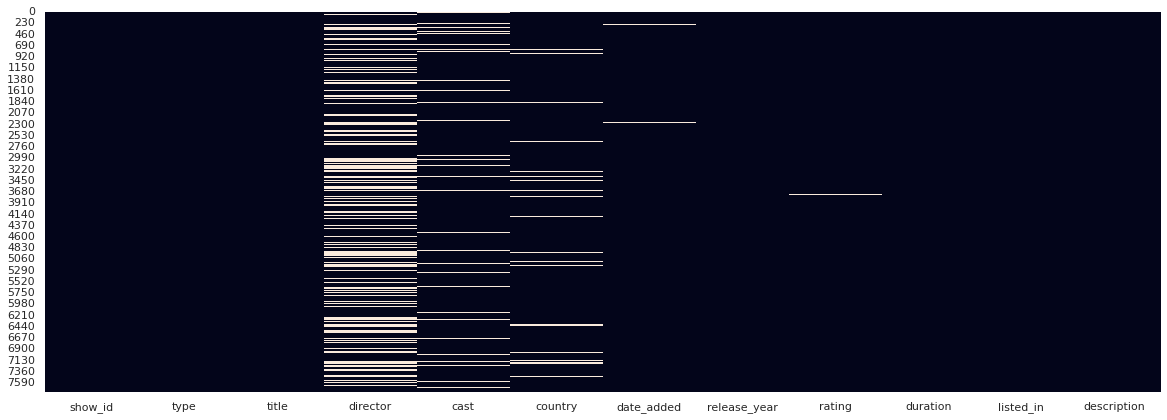

In [10]:
# Visualizing the missing values
plt.figure(figsize=(20,7))
sns.heatmap(dataset.isnull(), cbar=False)

### What did you know about your dataset?

This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine. It contains informations like title, director, cast, country, release_year, rating, duration	etc.

It has 7787 rows and 12 columns in the dataset.

## ***2. Understanding Your Variables***

In [11]:
# Dataset Columns
dataset.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [12]:
# Dataset Describe
dataset.describe()

,release_year
count,7787.000000
mean,2013.932580
std,8.757395
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2018.000000
max,2021.000000


### Variables Description 

* **show_id:** Unique ID for every Movie/TV Show
* **type:** Identifier - Movie or TV Show
* **title:** Title of the Movie/TV Show
* **director:** Director of the show
* **cast:** Actors involved
* **country:** Country of production
* **date_added:** Date it was added on Netflix
* **release_year:** Actual Release year of the show
* **rating:** TV Rating of the show
* **duration:** Total Duration in minutes or number of seasons
* **listed_in:** Genre
* **description:** The summary description

### Check Unique Values for each variable.

In [14]:
# Check Unique Values for each variable.
for i in dataset.columns.tolist():
  print("No. of unique values in ",i,"is",dataset[i].nunique())

No. of unique values in  show_id is 7787
No. of unique values in  type is 2
No. of unique values in  title is 7787
No. of unique values in  director is 4049
No. of unique values in  cast is 6831
No. of unique values in  country is 681
No. of unique values in  date_added is 1565
No. of unique values in  release_year is 73
No. of unique values in  rating is 14
No. of unique values in  duration is 216
No. of unique values in  listed_in is 492
No. of unique values in  description is 7769


## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Write your code to make your dataset analysis ready.

In [15]:
# Create a copy of the current dataset and assigning to df
df = dataset.copy()

In [18]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [72]:
# Checking different forrmat types of duration for TV Shows and Movies
import re

# Define regular expression patterns for TV show and movie durations
tvshow_pattern = r'^\d+ (Season|Seasons)$$'
movie_pattern = r'^\d+ min$'

# Check if all TV show durations match the pattern
tvshow_durations = df[df['type'] == 'TV Show']['duration']
tvshow_matches = all(tvshow_durations.str.match(tvshow_pattern))
print("All TV shows have durations in the format of n Seasons: ", tvshow_matches)

# Check if all movie durations match the pattern
movie_durations = df[df['type'] == 'Movie']['duration']
movie_matches = all(movie_durations.str.match(movie_pattern))
print("All movies have durations in the format of n minutes: ", movie_matches)


All TV shows have durations in the format of n Seasons:  True
All movies have durations in the format of n minutes:  True


In [110]:
#splitting listed_in into genre list
df['genres'] = df['listed_in'].apply(lambda x :  x.split(', '))

In [147]:
#splitting cast into actors list
df['actors'] = df['cast'].str.split(', ')

### What all manipulations have you done and insights you found?

Answer Here.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

Text(0.5, 0.98, 'Distribution of Movies and TV Shows')

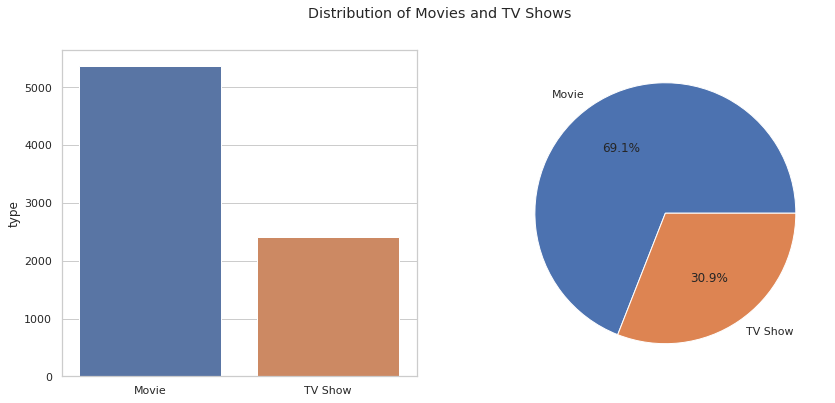

In [22]:
d = df['type'].value_counts()

plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sns.barplot(x=d.index, y=d)

plt.subplot(1,2,2)
p = plt.pie(d, labels=d.index, autopct="%.1f%%")
plt.suptitle('Distribution of Movies and TV Shows')

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 2

Text(0, 0.5, 'Count')

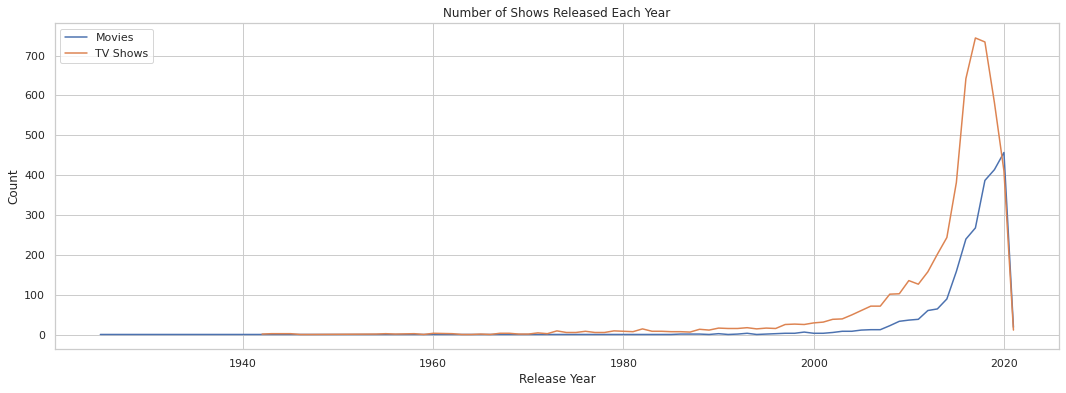

In [34]:
yearly_movies_count = df[df.type =='TV Show']['release_year'].value_counts().sort_index(ascending=False)
yearly_shows_count = df[df.type =='Movie']['release_year'].value_counts().sort_index(ascending=False)

plt.figure(figsize=(18,6))
sns.lineplot(x=yearly_movies_count.index, y=yearly_movies_count, label='Movies')
sns.lineplot(x=yearly_shows_count.index, y=yearly_shows_count, label='TV Shows')
plt.title('Number of Shows Released Each Year')
plt.xlabel('Release Year')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

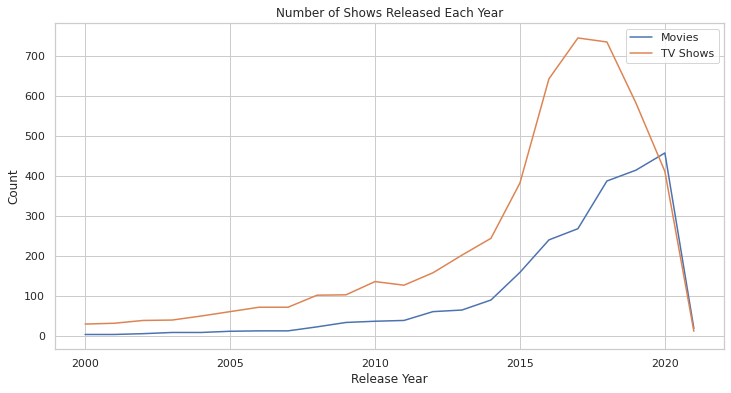

In [42]:
yearly_movies_count = df[df.type =='TV Show']['release_year'].value_counts().sort_index(ascending=False)
yearly_shows_count = df[df.type =='Movie']['release_year'].value_counts().sort_index(ascending=False)

yearly_movies_count = yearly_movies_count[yearly_movies_count.index>=2000]
yearly_shows_count = yearly_shows_count[yearly_shows_count.index>=2000]

plt.figure(figsize=(12,6))
sns.lineplot(x=yearly_movies_count.index, y=yearly_movies_count, label='Movies')
sns.lineplot(x=yearly_shows_count.index, y=yearly_shows_count, label='TV Shows')
plt.title('Number of Shows Released Each Year')
plt.xlabel('Release Year')
plt.ylabel('Count')

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 3

Text(0.5, 0.98, 'Top Countries with the Highest Number of TV Shows and Movies')

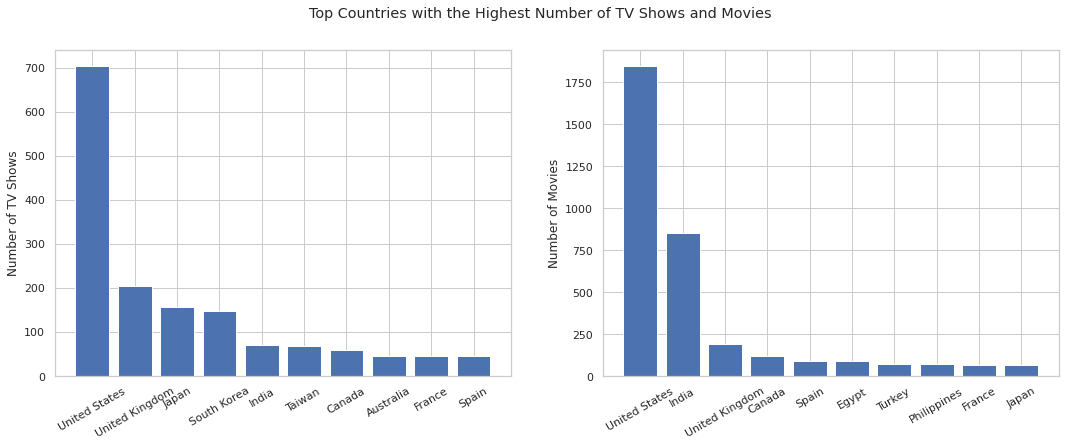

In [49]:
# Group the data by country and type, and count the number of entries in each group
d = df.groupby(['country', 'type']).size().reset_index(name='count')

d_tv = d[d['type'] == 'TV Show']
d_movies = d[d['type'] == 'Movie']

# Sort the result by count and get the top 10 countries
df_top_tv = d_tv.sort_values('count', ascending=False).head(10)
df_top_movies = d_movies.sort_values('count', ascending=False).head(10)

# Create a bar chart of the top countries with the highest number of TV Shows
plt.figure(figsize=(18,6))
plt.subplot(1,2,1)
plt.bar(df_top_tv['country'], df_top_tv['count'])
plt.ylabel('Number of TV Shows')
plt.xticks(rotation=30)

plt.subplot(1,2,2)
plt.bar(df_top_movies['country'], df_top_movies['count'])
plt.ylabel('Number of Movies')
plt.xticks(rotation=30)
plt.suptitle('Top Countries with the Highest Number of TV Shows and Movies')


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 4

Text(0.5, 0.98, 'Top movie and shows by ratings')

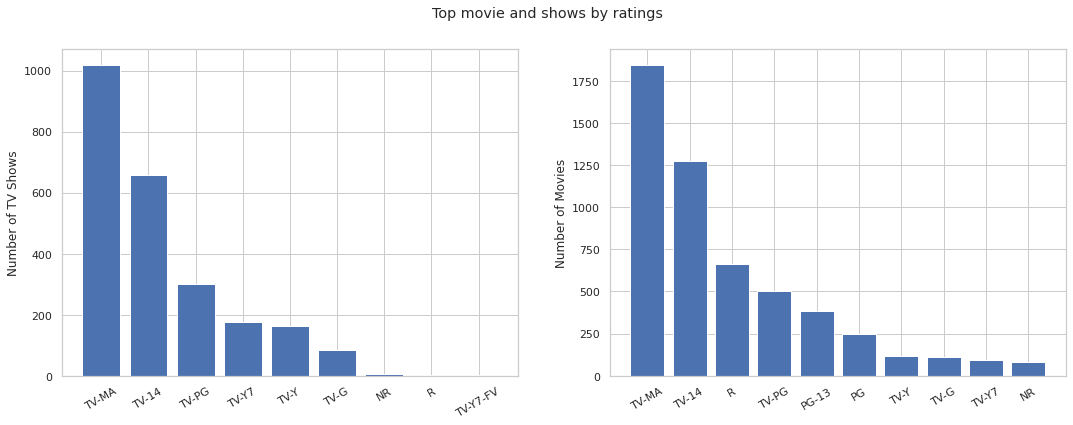

In [83]:
# Group the data by country and type, and count the number of entries in each group
d = df.groupby(['type', 'rating']).size().reset_index(name='count')

d_tv = d[d['type'] == 'TV Show']
d_movies = d[d['type'] == 'Movie']

# Sort the result by count and get the top 10 countries
df_top_tv = d_tv.sort_values('count', ascending=False).head(10)
df_top_movies = d_movies.sort_values('count', ascending=False).head(10)

# Create a bar chart of the top countries with the highest number of TV Shows
plt.figure(figsize=(18,6))
plt.subplot(1,2,1)
plt.bar(df_top_tv['rating'], df_top_tv['count'])
plt.ylabel('Number of TV Shows')
plt.xticks(rotation=30)

plt.subplot(1,2,2)
plt.bar(df_top_movies['rating'], df_top_movies['count'])
plt.ylabel('Number of Movies')
plt.xticks(rotation=30)
plt.suptitle('Top movie and shows by ratings')

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 5

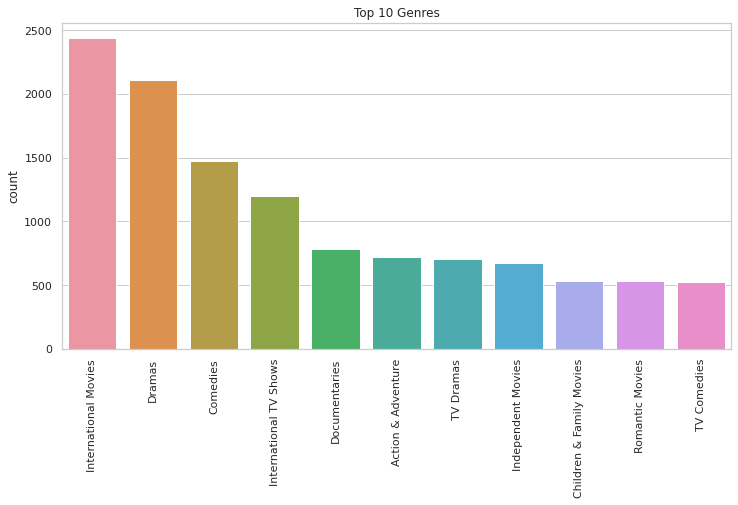

In [184]:
#Top 10 genres plot
genres = []
#count genre for each movies and shows
for i in df['genres']: 
  genres += i

cnts = Counter(genres)
genre_dict = dict(sorted(cnts.items(), key=lambda x: x[1], reverse=True))

df_genre_count = pd.DataFrame(genre_dict.values(), index=genre_dict.keys(), columns=['count']).sort_values(by='count', ascending=False).iloc[:11]

plt.figure(figsize=(12,6))
sns.barplot(x=df_genre_count.index, y=df_genre_count['count'])
plt.title("Top 10 Genres")
_ = plt.xticks(rotation=90)

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 6

Text(0.5, 1.0, 'Top TV Shows directors')

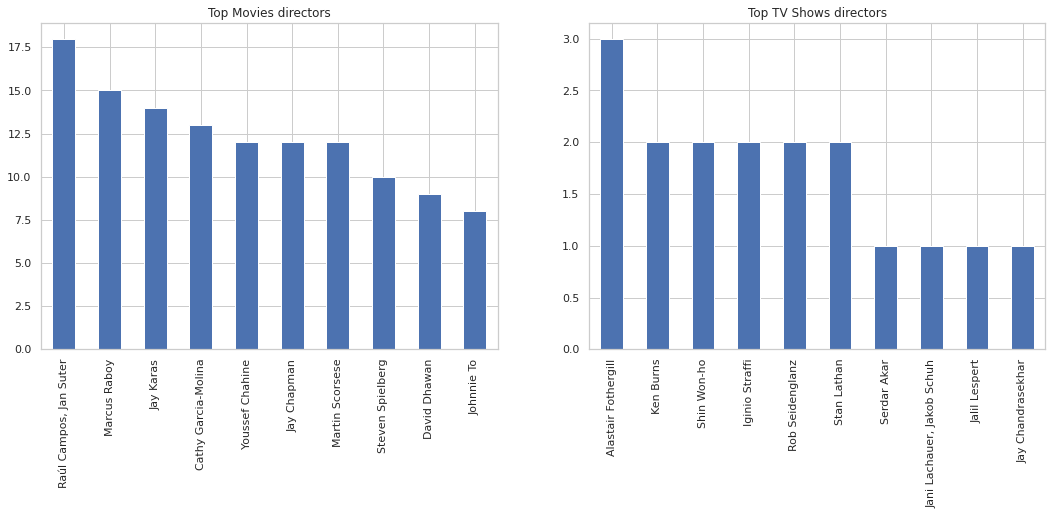

In [136]:
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
# top 10 directors who directed Movies
movies = df[df['type']=='Movie']['director'].value_counts()[:10].plot(kind='bar')
movies.set_title('Top Movies directors')

plt.subplot(1,2,2)
# top 10 directors who directed TV shows
tv_shows = df[df['type']=='TV Show']['director'].value_counts()[:10].plot(kind='bar')
tv_shows.set_title('Top TV Shows directors')

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 7

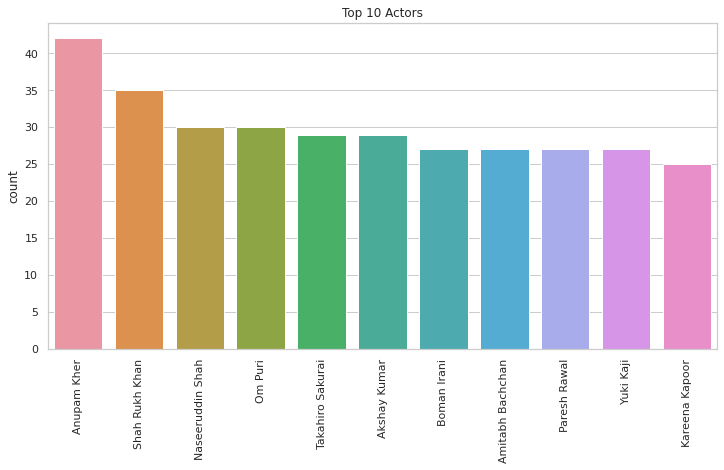

In [185]:
#Top 10 actors plot
actors = []
#count movies for each actor
for i in df['actors'].dropna():
  actors += i
    
lsts = list(df['actors'].dropna())
cnts = Counter(list(itertools.chain(*lsts)))
actor_dict = dict(sorted(cnts.items(), key=lambda x: x[1], reverse=True))

df_actor_count = pd.DataFrame(actor_dict.values(), index=actor_dict.keys(), columns=['count']).sort_values(by='count', ascending=False).iloc[:11]

plt.figure(figsize=(12,6))
sns.barplot(x=df_actor_count.index, y=df_actor_count['count'])
plt.title("Top 10 Actors")
_ = plt.xticks(rotation=90)

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8

In [ ]:
# Chart - 8 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9

In [ ]:
# Chart - 9 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

In [ ]:
# Chart - 10 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

In [ ]:
# Chart - 11 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

In [ ]:
# Chart - 12 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

In [ ]:
# Chart - 13 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

In [ ]:
# Correlation Heatmap visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot 

In [ ]:
# Pair Plot visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation

#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 2. Handling Outliers

In [ ]:
# Handling Outliers & Outlier treatments

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [ ]:
# Encode your categorical columns

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing 
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [ ]:
# Expand Contraction

#### 2. Lower Casing

In [ ]:
# Lower Casing

#### 3. Removing Punctuations

In [ ]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [ ]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [ ]:
# Remove Stopwords

In [ ]:
# Remove White spaces

#### 6. Rephrase Text

In [ ]:
# Rephrase Text

#### 7. Tokenization

In [ ]:
# Tokenization

#### 8. Text Normalization

In [ ]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [ ]:
# POS Taging

#### 10. Text Vectorization

In [ ]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [ ]:
# Transform Your data

### 6. Data Scaling

In [ ]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [ ]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why? 

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [ ]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [ ]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [ ]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***